# Import

In [17]:
# import modules
import pandas as pd
import numpy as np
import spotipy

# jupyter notebook full-width display
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# pandas formatting
pd.set_option('display.float_format', '{:_.3f}'.format)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 200)

# Import Data
from: Kevin 820 Data Import and Clean.ipynb

In [4]:
desired_formatting = [
    'id', 'song', 'artist',
    'acousticness', 'danceability', 'duration_ms', 'energy', 
    'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 
    'speechiness', 'tempo', 'time_signature', 'valence'
]

desired_formatting_timeseries = [
    'date', 
    'id', 'song', 'artist',
    'rank', 'last-week', 'peak-rank', 'weeks-on-board',
    'acousticness', 'danceability', 'duration_ms', 'energy', 
    'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 
    'speechiness', 'tempo', 'time_signature', 'valence'
]

# datatypes to reduce file sizes and increase calculation speed
# Int8 and float16 is enough to store data, but error occur with descriptive stats
# Try Int16 and float32
dtypes = {
    'key': 'Int16', 'mode': 'Int16', 'time_signature': 'Int16', 'tempo': 'float32', 
    'acousticness': 'float32', 'danceability': 'float32', 'duration_ms': 'Int32', 
    'energy': 'float32', 'instrumentalness': 'float32', 'liveness': 'float32', 
    'loudness': 'float32', 'speechiness': 'float32', 'valence': 'float32'
} 

dtypes_timeseries = {
    'rank': 'Int16', 'last-week': 'Int16', 'peak-rank': 'Int16', 'weeks-on-board': 'Int16'
}

# all songs with audio features (combined from 3 sources)
df_10M = pd.read_csv('every_song_with_data.csv', dtype=dtypes)
df_10M = df_10M[desired_formatting]

# all Billboard 100 lists, audio features included where possible
df_B100 = pd.read_csv(
    'all_audio_features_billboard_100.csv', 
    dtype={**dtypes, **dtypes_timeseries}
)
df_B100 = df_B100[desired_formatting_timeseries]
df_B100['date'] = pd.to_datetime(df_B100['date'])

# all unique songs from the Billboard 100 lists, audio features included where possible
df_B100_songs = pd.read_csv('all_audio_features_billboard_100_songs.csv', dtype=dtypes)
df_B100_songs = df_B100_songs[desired_formatting]

In [5]:
# No errors with Int16 and float32

df_10M.describe().loc['mean':'max'].T

,mean,std,min,25%,50%,75%,max
acousticness,0.4213421047,0.3735598326,0.0000000000,0.0335000008,0.3359999955,0.8169999719,0.9959999919
danceability,0.5275657177,0.1904722154,0.0000000000,0.3959999979,0.5450000167,0.6759999990,1.0000000000
duration_ms,97.4084946090,159341.5907809948,0.0000000000,169600.0000000000,216933.0000000000,275080.0000000000,19672058.0000000000
energy,0.5446365476,0.2815802395,0.0000000000,0.3100000024,0.5669999719,0.7889999747,1.0000000000
instrumentalness,0.2578041255,0.3736388981,0.0000000000,0.0000013200,0.0020999999,0.6449999809,1.0000000000
key,5.2371749580,3.5424904071,0.0000000000,2.0000000000,5.0000000000,8.0000000000,11.0000000000
liveness,0.2096685618,0.1800441295,0.0000000000,0.0964000002,0.1289999932,0.2619999945,1.0000000000
loudness,-10.9673919678,6.3175172806,-60.0000000000,-13.6750001907,-9.1960000992,-6.3979997635,7.2340002060
mode,0.6610928813,0.4733382585,0.0000000000,0.0000000000,1.0000000000,1.0000000000,1.0000000000
speechiness,0.0977755114,0.1350511312,0.0000000000,0.0357999988,0.0469999984,0.0821999982,0.9739999771


# SIGNIFICANT FIGURES CHECK

In [6]:
# 3 sig figs of accuracy is adequate for audio features
# everything beyond that appears to be rounding error, and shouldn't affect calculations
# float16 is adequate to store data (but float32 is required for statistical calculations)

df_10M.query('id=="33ZXjLCpiINn8eQIDYEPTD"')

,id,song,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
22205,33ZXjLCpiINn8eQIDYEPTD,"Shook Ones, Pt. II",Mobb Deep,0.0146000003,0.7630000114,325506,0.7860000134,0.0114000002,10,0.0816999972,-6.4720001221,0,0.2290000021,93.8570022583,4,0.5040000081


In [7]:
df_10M.query('id=="2jKoVlU7VAmExKJ1Jh3w9P"')

,id,song,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
392848,2jKoVlU7VAmExKJ1Jh3w9P,"Alkaholik (feat. Erik Sermon, J Ro & Tash)",Tash,0.1800000072,0.8930000067,219160,0.5139999986,0.0000000000,11,0.0595999993,-5.0799999237,1,0.2829999924,95.8479995728,4,0.7870000005


In [8]:
df_10M.query('id=="7iL6o9tox1zgHpKUfh9vuC"')

,id,song,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
22198,7iL6o9tox1zgHpKUfh9vuC,In Da Club,50 Cent,0.2549999952,0.8989999890,193466,0.7129999995,0.0000000000,6,0.0707999989,-2.7520000935,0,0.3659999967,90.0510025024,4,0.7770000100


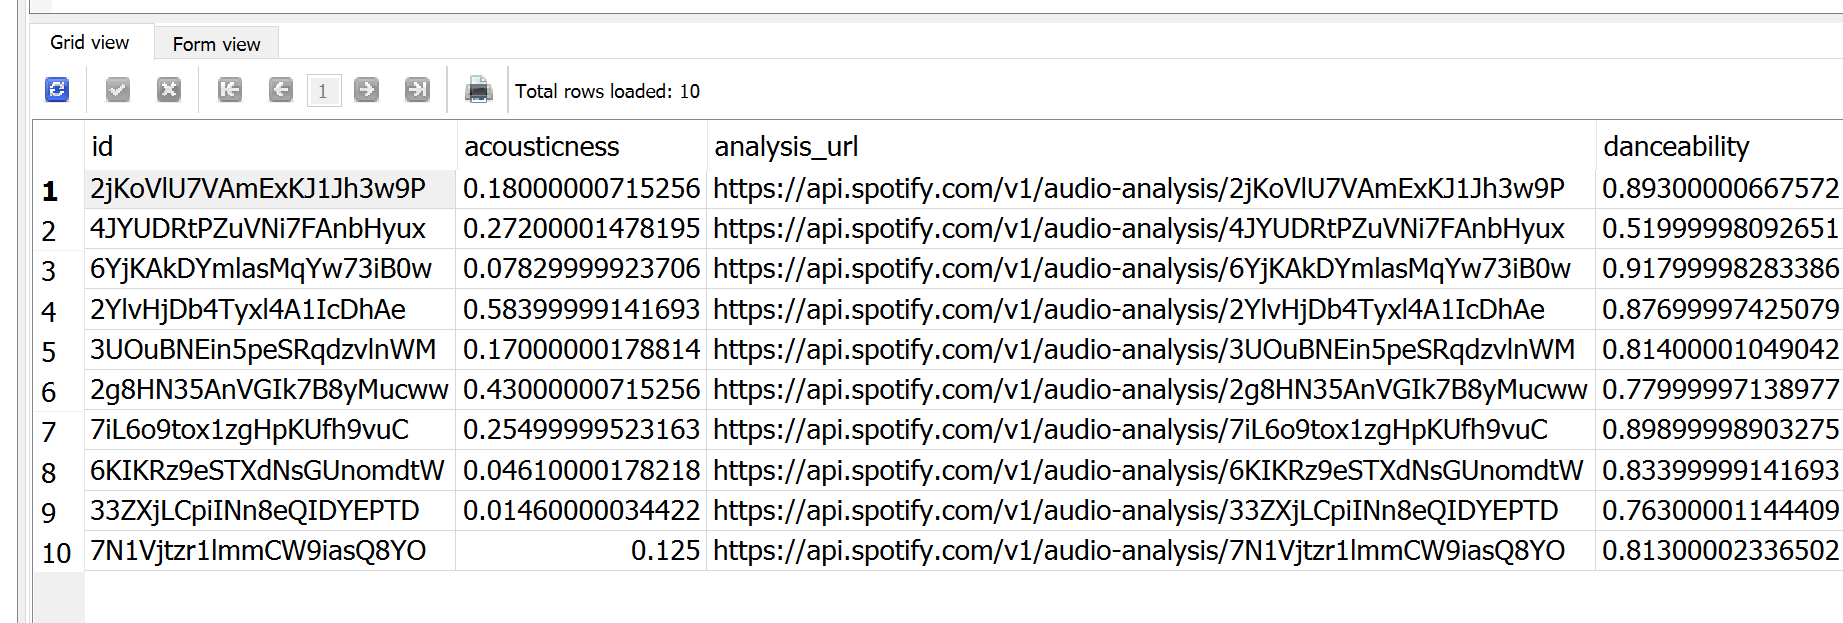

### Save as Parquet Format

In [ ]:
# Save Data
df_10M.to_parquet('df_10M.parquet')
df_B100.to_parquet('df_B100.parquet')
df_B100_songs.to_parquet('df_B100_songs.parquet')

# Import Release Date

### Reimport Data First

In [52]:
# all songs with audio features (combined from 3 sources)
df_10M = pd.read_parquet('df_10M.parquet')

# all Billboard 100 lists, audio features included where possible
df_B100 = pd.read_parquet('df_B100.parquet')

# all unique songs from the Billboard 100 lists, audio features included where possible
df_B100_songs = pd.read_parquet('df_B100_songs.parquet')

# all unique songs from the Billboard 100 lists, only songs with audio features included
df_B100_songs_AF = df_B100_songs.dropna().copy().reset_index(drop=True)

### Spotify API (Hot 100 songs)

##### get a temporary authorization token from: https://developer.spotify.com/console/get-search-item

In [121]:
# input the temporary token
TEMP_TOKEN = input('Enter token: ')

# create a spotify object
spotify = spotipy.Spotify(auth=TEMP_TOKEN)

Enter token: BQCoJoa0yB7VAVrWrWQs7pnv8cWO2bb8XevJRVCPKAkPD6eGKANwzZWQKnT2UzXPApJbSpIJpx9rVPD0Y8ICr7i4Uihy6mCL6nQ78lsMKtMHr24psF5ZPYdZfBxbt8A33lN_748f7xuLAwBjy64_VNy2UKXa6HQ8L2FtFmp8oV38


In [118]:
def get_release_date(track_id):
    track_info = spotify.track(track_id)
    return track_info['album']['release_date']

In [119]:
try: # only do this once, if row exists, just show head()
    display(df_B100_songs['release_date'].head())
except:
    df_B100_songs['release_date'] = ''

0          1965
1    1965-01-01
2          1965
3           NaN
4    1996-12-31
Name: release_date, dtype: object

In [122]:
# start over at
start_over_at = 30000

# populate df_billboard_songs with ids, where available
for i, row in df_B100_songs.iterrows():
    
    # start over at
    if i < start_over_at-1:
        continue
    
    # show status update
    if i%100 == 0:
        print(i, end='  ')
    if i%1000 == 0:
        print()
        
    # start over where we finished (don't overwrite known release_dates)
    # np.nan != '' should work
    if row['release_date'] != '':  
        continue
    
    # if id nan, release_date is unknown
    if pd.isna(row['id']):  # if id is not known  
        df_B100_songs.loc[i, 'release_date'] = np.nan
    else:
        df_B100_songs.loc[i, 'release_date'] = get_release_date(row['id'])
    
        # save every 1000 rows, if new
        if i%1000 == 0:
            df_B100_songs.to_parquet('df_B100_songs_TEMP.parquet')
        
# save final dataframe
df_B100_songs.to_parquet('df_B100_songs.parquet')

27800  27900  28000  
28100  28200  28300  28400  28500  28600  28700  28800  28900  29000  
29100  29200  29300  29400  29500  29600  

### From SQL (10M songs)

In [53]:
# import sql release dates
sql_release_dates = pd.read_csv('release_dates_from_sql.csv')

In [ ]:
# replace anything older than billboard with arbitrary date, to remove out of bound error
# min 
min_date, replace_date = -360200000000, -2208988800000
df_B100.date.min(), pd.to_datetime(min_date, unit='ms', origin='unix'), pd.to_datetime(replace_date, unit='ms', origin='unix')

In [55]:
# replace dates
sql_release_dates.loc[sql_release_dates.release_date < min_date, 'release_date'] = replace_date

# change to datetime format
sql_release_dates['release_date'] = pd.to_datetime(sql_release_dates['release_date'], unit='ms', origin='unix')

In [56]:
sql_release_dates.head()

,id,release_date
0,2g8HN35AnVGIk7B8yMucww,1994-09-13
1,4E5IFAXCob6QqZaJMTw5YN,2003-01-01
2,1gSt2UlC7mtRtJIc5zqKWn,2007-01-01
3,67IvfvAMYQzJEeHopvwMMW,1999-10-19
4,2I9foKseoFQh07p6sD2voE,2003-02-06


### also need 1.2M file release dates

In [96]:
# import csv release dates
csv_release_dates = pd.read_csv(r'D:\RYERSON\820\Datasets\Spotify 1.2M+ Songs\tracks_features.csv')

# remove useless columns
csv_release_dates = csv_release_dates[['id', 'release_date']]

# change to datetime format
# https://stackoverflow.com/questions/32888124/pandas-out-of-bounds-nanosecond-timestamp-after-offset-rollforward-plus-adding-a
csv_release_dates['release_date'] = pd.to_datetime(csv_release_dates['release_date'], errors = 'coerce')

### merge release date files

In [102]:
all_release_dates = pd.concat(
    [sql_release_dates, csv_release_dates]
).drop_duplicates().reset_index(drop=True)

,id,release_date
0,2g8HN35AnVGIk7B8yMucww,1994-09-13
1,4E5IFAXCob6QqZaJMTw5YN,2003-01-01
2,1gSt2UlC7mtRtJIc5zqKWn,2007-01-01
3,67IvfvAMYQzJEeHopvwMMW,1999-10-19
4,2I9foKseoFQh07p6sD2voE,2003-02-06
...,...,...
9456081,0EsMifwUmMfJZxzoMPXJKZ,2014-01-09
9456082,2WSc2TB1CSJgGE0PEzVeiu,2014-01-09
9456083,6iProIgUe3ETpO6UT0v5Hg,2014-01-09
9456084,37B4SXC8uoBsUyKCWnhPfX,2014-01-09


In [104]:
all_release_dates.describe(datetime_is_numeric=True)

,release_date
count,9456076
mean,2007-11-01 22:42:05.154323200
min,1900-01-01 00:00:00
25%,2005-03-03 00:00:00
50%,2011-08-23 00:00:00
75%,2015-09-18 00:00:00
max,2022-02-11 00:00:00


previous level of missing values = 9%

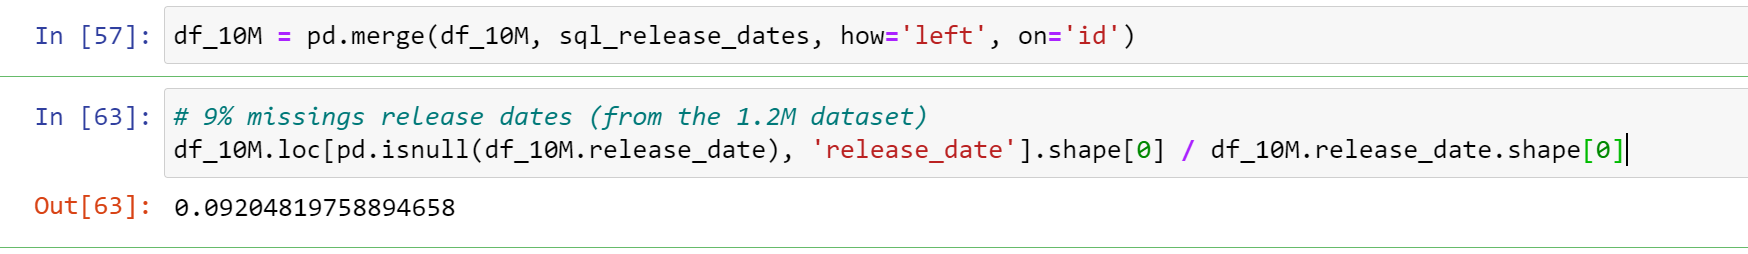

### now merge with dataset

In [106]:
# RESTART WITH CLEAN df_10M
df_10M = pd.read_parquet('df_10M.parquet')

In [107]:
df_10M.head()

,id,song,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,7DZsH0df0GuULl0FGwXMfd,Misty,"""Groove"" Holmes",0.806,0.581,360986,0.556,0.925,8,0.218,-10.422,1,0.054,93.478,4,0.313
1,11Aldbvo6UCcVhBzv4oUdw,What Now My Love,"""Groove"" Holmes",0.648,0.562,327560,0.573,0.314,7,0.056,-10.972,1,0.034,91.845,4,0.810
2,4KRLWRl1bFjnXhY5MgZWrM,May The Bird Of Paradise Fly Up Your Nose,"""Little"" Jimmy Dickens",0.738,0.660,151693,0.801,0.000,4,0.627,-8.446,1,0.115,104.374,4,0.867
3,5r96TaQquRrlo3Ym3ZlSL2,Amish Paradise,"""Weird Al"" Yankovic",0.103,0.728,202920,0.448,0.000,8,0.267,-10.540,1,0.172,80.902,4,0.483
4,1gloYGAZI6eHp6MEPjLuL3,Canadian Idiot,"""Weird Al"" Yankovic",0.002,0.543,143040,0.697,0.000,8,0.343,-9.211,1,0.061,185.978,4,0.861


In [108]:
df_10M = pd.merge(df_10M, all_release_dates, how='left', on='id')

In [109]:
# 9% missings release dates (missing the 1.2M dataset)
# 1.5% missings release dates (after adding the 1.2M dataset)
df_10M.loc[pd.isnull(df_10M.release_date), 'release_date'].shape[0] / df_10M.release_date.shape[0]

0.015220704590811296

In [117]:
# missing
df_10M.loc[pd.isnull(df_10M.release_date), 'release_date'].shape[0]

146144

In [118]:
# replace null dates with replace_date
df_10M.loc[pd.isnull(df_10M.release_date), 'release_date'] = pd.to_datetime(replace_date, unit='ms', origin='unix')

In [119]:
df_10M.head()

,id,song,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,release_date
0,7DZsH0df0GuULl0FGwXMfd,Misty,"""Groove"" Holmes",0.806,0.581,360986,0.556,0.925,8,0.218,-10.422,1,0.054,93.478,4,0.313,1965-01-01
1,11Aldbvo6UCcVhBzv4oUdw,What Now My Love,"""Groove"" Holmes",0.648,0.562,327560,0.573,0.314,7,0.056,-10.972,1,0.034,91.845,4,0.810,1900-01-01
2,4KRLWRl1bFjnXhY5MgZWrM,May The Bird Of Paradise Fly Up Your Nose,"""Little"" Jimmy Dickens",0.738,0.660,151693,0.801,0.000,4,0.627,-8.446,1,0.115,104.374,4,0.867,1965-01-01
3,5r96TaQquRrlo3Ym3ZlSL2,Amish Paradise,"""Weird Al"" Yankovic",0.103,0.728,202920,0.448,0.000,8,0.267,-10.540,1,0.172,80.902,4,0.483,1996-12-31
4,1gloYGAZI6eHp6MEPjLuL3,Canadian Idiot,"""Weird Al"" Yankovic",0.002,0.543,143040,0.697,0.000,8,0.343,-9.211,1,0.061,185.978,4,0.861,2006-09-26


# Import Genre

### Reimport Data First

In [2]:
# all songs with audio features (combined from 3 sources)
df_10M = pd.read_parquet('df_10M.parquet')

# all Billboard 100 lists, audio features included where possible
df_B100 = pd.read_parquet('df_B100.parquet')

# all unique songs from the Billboard 100 lists, audio features included where possible
df_B100_songs = pd.read_parquet('df_B100_songs.parquet')

# all unique songs from the Billboard 100 lists, only songs with audio features included
df_B100_songs_AF = df_B100_songs.dropna().copy().reset_index(drop=True)


In [25]:
# genre info from sql
df_artist_genres_10M = pd.read_csv('artist_genre_sql.csv')
df_sorted_list_of_genres = pd.read_csv('sorted_list_of_genres.csv')
sql_artist_id_by_track = pd.read_csv('sql_artist_id_by_track.csv')

In [26]:
df_sorted_list_of_genres.head()

,genre_id,counts
0,dance pop,591
1,pop,585
2,rock,579
3,electro house,572
4,latin,515


### Spotify API (Hot 100 songs)

##### get a temporary authorization token from: https://developer.spotify.com/console/get-search-item

In [7]:
# input the temporary token
TEMP_TOKEN = input('Enter token: ')

# create a spotify object
spotify = spotipy.Spotify(auth=TEMP_TOKEN)

Enter token: BQB1h9QZsWb41EeaoLbiBcsbTyEDl6C5Y7p-gs6agR6RtyY9lLYzWu-I1cjvmwardmdwSh3AwptFlq2OuV0fqirkoofKQiaCIZRV48d8Z6tD5qtE_hJERziTA7AY9nBbS1lqFH5bvGzqJGTk87QhNsdH-25oMWpJ6f-pfKPvZ3aY


In [33]:
# HELPER FUNCTIONS

def get_artist_id_by_track(track_id):
    track_info = spotify.track(track_id)
    return track_info['artists'][0]['id']

def get_genre_by_artist(artist_id):
    """this picks the most common genre, NOT the most relevant genre"""
    artist_info = spotify.artist(artist_id)
    list_of_genres = artist_info['genres']
    
    # default to alphabetically first genre from spotify
    most_common_genre = list_of_genres[0]
    if len(list_of_genres) == 1:
        pass
    else:
        for i, row in df_sorted_list_of_genres.iterrows():
            if row['genre_id'] in list_of_genres:
                return row['genre_id']
    return most_common_genre

# GENRE FUNCTION

def get_genre(track_id):
    """combines 2 helper functions, makes 2 queries to Spotify API"""
    artist_id = get_artist_id_by_track(track_id)
    return get_genre_by_artist(artist_id)

In [34]:
track_id = '7DZsH0df0GuULl0FGwXMfd'
get_genre(track_id)
# seems to work

'jazz funk'

In [ ]:
# TESTING

In [ ]:
def get_artist_id(track_id):
    track_info = spotify.track(track_id)
    return track_info['artists'][0]['id']

track_id = '7DZsH0df0GuULl0FGwXMfd'
artist_id = get_artist_id(track_id)
artist_id

In [31]:
artist_id = '7izkpvBGc31hUccjdSNz8k'

def get_genre(artist_id):
    artist_info = spotify.artist(artist_id)
    list_of_genres = artist_info['genres']
    
    # default to alphabetically first genre from spotify
    most_common_genre = list_of_genres[0]
    if len(list_of_genres) == 1:
        pass
    else:
        for i, row in df_sorted_list_of_genres.iterrows():
            if row['genre_id'] in list_of_genres:
                return row['genre_id']
    return most_common_genre

genre_id = get_genre(artist_id)
genre_id

'jazz funk'

In [32]:
artist_id = '7izkpvBGc31hUccjdSNz8k'
artist_info = spotify.artist(artist_id)
artist_info['genres']

['instrumental soul', 'jazz funk', 'jazz organ', 'soul jazz']

In [8]:
df_B100_songs_AF.head()

,id,song,artist,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,release_date
0,7DZsH0df0GuULl0FGwXMfd,Misty,"""Groove"" Holmes",0.806,0.581,360986,0.556,0.925,8,0.218,-10.422,1,0.054,93.478,4,0.313,1965
1,11Aldbvo6UCcVhBzv4oUdw,What Now My Love,"""Groove"" Holmes",0.648,0.562,327560,0.573,0.314,7,0.056,-10.972,1,0.034,91.845,4,0.810,1965-01-01
2,4KRLWRl1bFjnXhY5MgZWrM,May The Bird Of Paradise Fly Up Your Nose,"""Little"" Jimmy Dickens",0.738,0.660,151693,0.801,0.000,4,0.627,-8.446,1,0.115,104.374,4,0.867,1965
3,5r96TaQquRrlo3Ym3ZlSL2,Amish Paradise,"""Weird Al"" Yankovic",0.103,0.728,202920,0.448,0.000,8,0.267,-10.540,1,0.172,80.902,4,0.483,1996-12-31
4,1gloYGAZI6eHp6MEPjLuL3,Canadian Idiot,"""Weird Al"" Yankovic",0.002,0.543,143040,0.697,0.000,8,0.343,-9.211,1,0.061,185.978,4,0.861,2006-09-26


### reorder dataframes and resave them

In [ ]:
desired_formatting = [
    'id', 'song', 'artist', 'genre', 'release_date',
    'acousticness', 'danceability', 'duration_ms', 'energy', 
    'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 
    'speechiness', 'tempo', 'time_signature', 'valence'
]

# reorder
df_10M = df_10M[desired_formatting]
df_B100_songs = df_B100_songs[desired_formatting]

# save

